# Vector Space Model

- 주어진 세개의 document를 세가지 방법의 tf-based VSM로 각각 표현


In [1]:
import pandas as pd
import math 

In [2]:
f= open('data_week7.txt','r', encoding='utf-8')
for i in range(10):
    line = f.readline()
    print(line)

documnet 1 = 경찰청 철창살은 외철창살이냐 쌍철창살이냐 경찰청 철창살이 쇠철창살이냐 철철창살이냐검찰청 쇠철창살은 새쇠철창살이냐 헌쇠철창살이냐 경찰청 쇠창살 외철창살, 검찰청 쇠창살 쌍철창살.



documnet 2 = 내가 그린 기린 그림은 잘 그린 기린 그림이고 네가 그린 기린 그림은 잘 못 그린 기린 그림이다. 내가 그린 기린 그림은 긴 기린 그림이냐, 그냥 그린 기린 그림이냐? 내가 그린 구름그림은 새털구름 그린 구름그림이고, 네가 그린 구름그림은 깃털구름 그린 구름그림이다.



documnet 3 = 안촉촉한 초코칩 나라에 살던 안촉촉한 초코칩이 촉촉한 초코칩 나라의 촉촉한 초코칩을 보고 촉촉한 초코칩이 되고 싶어서 촉촉한 초코칩 나라에 갔는데 촉촉한 초코칩 나라의 촉촉한 초코칩 문지기가 "넌 촉촉한 초코칩이 아니고 안촉촉한 초코칩이니까 안촉촉한 초코칩나라에서 살아"라고해서 안촉촉한 초코칩은 촉촉한 초코칩이 되는것을 포기하고 안촉촉한 초코칩 나라로 돌아갔다.







## txt to python 
- txt파일에서 documents 불러온 후 불용어 제거하여 리스트로 정리했습니다.

In [3]:
f= open('data_week7.txt','r', encoding='utf-8')
for i in range(10):
    line = f.readline()
    if i ==0 :
        #불용어 제거 
        line = line.strip().replace(',','').replace('.','').replace('철철창살이냐검찰청', '철철창살이냐 검찰청')
        doc1 = line.split(' ')
        print(doc1)
    elif i == 2:
        #불용어 제거 
        line = line.strip().replace('.','').replace(',','').replace('?','')
        doc2 = line.split(' ')
        print(doc2)
    elif i ==4:
        #불용어 제거 
        line = line.strip().replace('.','').replace('"','')
        doc3 = line.split(' ')
        print(doc3)
    
f.close

['documnet', '1', '=', '경찰청', '철창살은', '외철창살이냐', '쌍철창살이냐', '경찰청', '철창살이', '쇠철창살이냐', '철철창살이냐', '검찰청', '쇠철창살은', '새쇠철창살이냐', '헌쇠철창살이냐', '경찰청', '쇠창살', '외철창살', '검찰청', '쇠창살', '쌍철창살']
['documnet', '2', '=', '내가', '그린', '기린', '그림은', '잘', '그린', '기린', '그림이고', '네가', '그린', '기린', '그림은', '잘', '못', '그린', '기린', '그림이다', '내가', '그린', '기린', '그림은', '긴', '기린', '그림이냐', '그냥', '그린', '기린', '그림이냐', '내가', '그린', '구름그림은', '새털구름', '그린', '구름그림이고', '네가', '그린', '구름그림은', '깃털구름', '그린', '구름그림이다']
['documnet', '3', '=', '안촉촉한', '초코칩', '나라에', '살던', '안촉촉한', '초코칩이', '촉촉한', '초코칩', '나라의', '촉촉한', '초코칩을', '보고', '촉촉한', '초코칩이', '되고', '싶어서', '촉촉한', '초코칩', '나라에', '갔는데', '촉촉한', '초코칩', '나라의', '촉촉한', '초코칩', '문지기가', '넌', '촉촉한', '초코칩이', '아니고', '안촉촉한', '초코칩이니까', '안촉촉한', '초코칩나라에서', '살아라고해서', '안촉촉한', '초코칩은', '촉촉한', '초코칩이', '되는것을', '포기하고', '안촉촉한', '초코칩', '나라로', '돌아갔다']


<function TextIOWrapper.close()>

- 무의미한 단어(document 1 = ) 제거

In [4]:
# 앞부분(documnt n =) 제거 
doc1 = doc1[3:]
doc2 = doc2[3:]
doc3 = doc3[3:]

In [5]:
# 불용어 제거 후 각 document 리스트 확인
print(doc1,'\n\n',doc2,'\n\n',doc3)

['경찰청', '철창살은', '외철창살이냐', '쌍철창살이냐', '경찰청', '철창살이', '쇠철창살이냐', '철철창살이냐', '검찰청', '쇠철창살은', '새쇠철창살이냐', '헌쇠철창살이냐', '경찰청', '쇠창살', '외철창살', '검찰청', '쇠창살', '쌍철창살'] 

 ['내가', '그린', '기린', '그림은', '잘', '그린', '기린', '그림이고', '네가', '그린', '기린', '그림은', '잘', '못', '그린', '기린', '그림이다', '내가', '그린', '기린', '그림은', '긴', '기린', '그림이냐', '그냥', '그린', '기린', '그림이냐', '내가', '그린', '구름그림은', '새털구름', '그린', '구름그림이고', '네가', '그린', '구름그림은', '깃털구름', '그린', '구름그림이다'] 

 ['안촉촉한', '초코칩', '나라에', '살던', '안촉촉한', '초코칩이', '촉촉한', '초코칩', '나라의', '촉촉한', '초코칩을', '보고', '촉촉한', '초코칩이', '되고', '싶어서', '촉촉한', '초코칩', '나라에', '갔는데', '촉촉한', '초코칩', '나라의', '촉촉한', '초코칩', '문지기가', '넌', '촉촉한', '초코칩이', '아니고', '안촉촉한', '초코칩이니까', '안촉촉한', '초코칩나라에서', '살아라고해서', '안촉촉한', '초코칩은', '촉촉한', '초코칩이', '되는것을', '포기하고', '안촉촉한', '초코칩', '나라로', '돌아갔다']


In [6]:
# set을 이용해서 각 문서에서 중복 제거 term corpus
doc1_set = list(set(doc1))
doc2_set = list(set(doc2))
doc3_set = list(set(doc3))

In [7]:
# corpus에 따라 각 doc의 단어 빈번도 탐색
document= [doc1, doc2, doc3]
docs_set = [doc1_set,doc2_set,doc3_set]
freq = []
for doc_set,doc_n in zip(docs_set,document):
    for i in doc_set:
        print(i, doc_n.count(i))
        freq.append(doc_n.count(i))
    print('\n')

쇠철창살은 1
외철창살이냐 1
새쇠철창살이냐 1
경찰청 3
쇠창살 2
외철창살 1
쌍철창살 1
헌쇠철창살이냐 1
철창살은 1
철철창살이냐 1
철창살이 1
검찰청 2
쇠철창살이냐 1
쌍철창살이냐 1


구름그림은 2
그림이고 1
기린 7
새털구름 1
못 1
구름그림이고 1
잘 2
그림은 3
내가 3
네가 2
긴 1
깃털구름 1
구름그림이다 1
그림이냐 2
그린 10
그림이다 1
그냥 1


돌아갔다 1
나라로 1
보고 1
싶어서 1
되는것을 1
되고 1
살아라고해서 1
나라의 2
안촉촉한 6
초코칩이니까 1
초코칩이 4
촉촉한 8
초코칩나라에서 1
초코칩을 1
나라에 2
초코칩 6
아니고 1
초코칩은 1
문지기가 1
포기하고 1
갔는데 1
살던 1
넌 1




-----
# tf-based VSM representation (boolean)
- 각 doc에대해 term 존재하면 1,  존재하지 않으면 0으로 boolean 표기  
각 document corpus(doc_set)에 대해       
document를 count하여 조건문을 통해   
존재(0보다 큰경우)하면 1, 존재하지 않으면 0으로 표기 했습니다.

In [8]:
docs_set = [doc1_set, doc2_set,doc3_set]

for doc_set,n in zip(docs_set,range(1,4)):
    freq1 ,freq2, freq3 = [],[],[]

    for j in doc_set:
        freq1.append(1 if doc1.count(j) >0 else 0    )
        freq2.append(1 if doc2.count(j) >0 else 0    )
        freq3.append(1 if doc3.count(j) >0 else 0    )
    freq = [tuple(freq1),tuple(freq2),tuple(freq3)]
    
    if n == 1:
        df_bool1 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])
    
    elif n==2:
        df_bool2 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])

    elif n==3:
        df_bool3 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])

In [9]:
df_bool1

,쇠철창살은,외철창살이냐,새쇠철창살이냐,경찰청,쇠창살,외철창살,쌍철창살,헌쇠철창살이냐,철창살은,철철창살이냐,철창살이,검찰청,쇠철창살이냐,쌍철창살이냐
doc1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
doc2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_bool2

,구름그림은,그림이고,기린,새털구름,못,구름그림이고,잘,그림은,내가,네가,긴,깃털구름,구름그림이다,그림이냐,그린,그림이다,그냥
doc1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
doc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df_bool3

,돌아갔다,나라로,보고,싶어서,되는것을,되고,살아라고해서,나라의,안촉촉한,초코칩이니까,...,초코칩을,나라에,초코칩,아니고,초코칩은,문지기가,포기하고,갔는데,살던,넌
doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


-----
# tf-based VSM representation (simple)
- 각 doc에대해 term의 frequency count하여 표기

In [12]:
docs_set = [doc1_set, doc2_set,doc3_set]

for doc_set,n in zip(docs_set,range(1,4)):
    freq1 ,freq2, freq3 = [],[],[]

    for j in doc_set:
        freq1.append(doc1.count(j))
        freq2.append(doc2.count(j))
        freq3.append(doc3.count(j))
    freq = [tuple(freq1),tuple(freq2),tuple(freq3)]
    
    if n == 1:
        df_single1 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])
    
    elif n==2:
        df_single2 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])

    elif n==3:
        df_single3 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])

In [13]:
df_single1

,쇠철창살은,외철창살이냐,새쇠철창살이냐,경찰청,쇠창살,외철창살,쌍철창살,헌쇠철창살이냐,철창살은,철철창살이냐,철창살이,검찰청,쇠철창살이냐,쌍철창살이냐
doc1,1,1,1,3,2,1,1,1,1,1,1,2,1,1
doc2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_single2

,구름그림은,그림이고,기린,새털구름,못,구름그림이고,잘,그림은,내가,네가,긴,깃털구름,구름그림이다,그림이냐,그린,그림이다,그냥
doc1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc2,2,1,7,1,1,1,2,3,3,2,1,1,1,2,10,1,1
doc3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_single3

,돌아갔다,나라로,보고,싶어서,되는것을,되고,살아라고해서,나라의,안촉촉한,초코칩이니까,...,초코칩을,나라에,초코칩,아니고,초코칩은,문지기가,포기하고,갔는데,살던,넌
doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc3,1,1,1,1,1,1,1,2,6,1,...,1,2,6,1,1,1,1,1,1,1


-----
# tf-based VSM representation (logarithmatically scaled)
- 각 doc에대해 term의 frequency를 구하여 log(1+tf(t,d)) 계산 
- 이때, math 패키지의 log 함수 사용했습니다.

In [16]:
docs_set = [doc1_set, doc2_set,doc3_set]

for doc_set,n in zip(docs_set,range(1,4)):
    freq1 ,freq2, freq3 = [],[],[]

    for j in doc_set:
        freq1.append(round(math.log(1+doc1.count(j),10),4))
        freq2.append(round(math.log(1+doc2.count(j),10),4))
        freq3.append(round(math.log(1+doc3.count(j),10),4))
    freq = [tuple(freq1),tuple(freq2),tuple(freq3)]
    
    if n == 1:
        df_log1 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])
    
    elif n==2:
        df_log2 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])

    elif n==3:
        df_log3 = pd.DataFrame(data = freq, columns=doc_set, index=['doc1','doc2','doc3'])

In [17]:
df_log1

,쇠철창살은,외철창살이냐,새쇠철창살이냐,경찰청,쇠창살,외철창살,쌍철창살,헌쇠철창살이냐,철창살은,철철창살이냐,철창살이,검찰청,쇠철창살이냐,쌍철창살이냐
doc1,0.301,0.301,0.301,0.6021,0.4771,0.301,0.301,0.301,0.301,0.301,0.301,0.4771,0.301,0.301
doc2,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000
doc3,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.000,0.000


In [18]:
df_log2

,구름그림은,그림이고,기린,새털구름,못,구름그림이고,잘,그림은,내가,네가,긴,깃털구름,구름그림이다,그림이냐,그린,그림이다,그냥
doc1,0.0000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000
doc2,0.4771,0.301,0.9031,0.301,0.301,0.301,0.4771,0.6021,0.6021,0.4771,0.301,0.301,0.301,0.4771,1.0414,0.301,0.301
doc3,0.0000,0.000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.0000,0.0000,0.000,0.000


In [19]:
df_log3

,돌아갔다,나라로,보고,싶어서,되는것을,되고,살아라고해서,나라의,안촉촉한,초코칩이니까,...,초코칩을,나라에,초코칩,아니고,초코칩은,문지기가,포기하고,갔는데,살던,넌
doc1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
doc2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,...,0.000,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
doc3,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.4771,0.8451,0.301,...,0.301,0.4771,0.8451,0.301,0.301,0.301,0.301,0.301,0.301,0.301


## 정리
- tf-based VSM의 boolean, simple, logarithmatically scaled 3가지 방법으로 표현 했습니다.
- 그리고 이 dataframe들을 각 document별로 구분하여 sheet를 구성하여 excel로 저장했습니다.

In [20]:
df1 = df_bool1.append(df_single1)
df1 = df1.append(df_log1)

df2 = df_bool2.append(df_single2)
df2 = df2.append(df_log2)

df3 = df_bool3.append(df_single3)
df3 = df3.append(df_log3)

In [21]:
# 위 데이터프레임을 엑셀로 저장
writer = pd.ExcelWriter('week7.xlsx', engine='xlsxwriter')

df1.to_excel(writer, sheet_name= 'document 1')
df2.to_excel(writer, sheet_name= 'document 2')
df3.to_excel(writer, sheet_name= 'document 3')

writer.save()

In [22]:
from IPython.display import Image

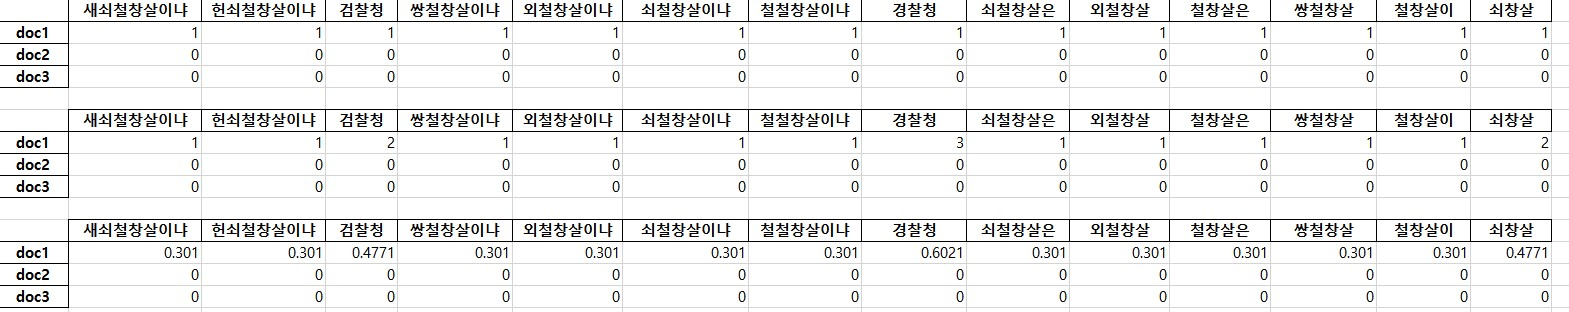

In [23]:
Image("img/document1.jpg")

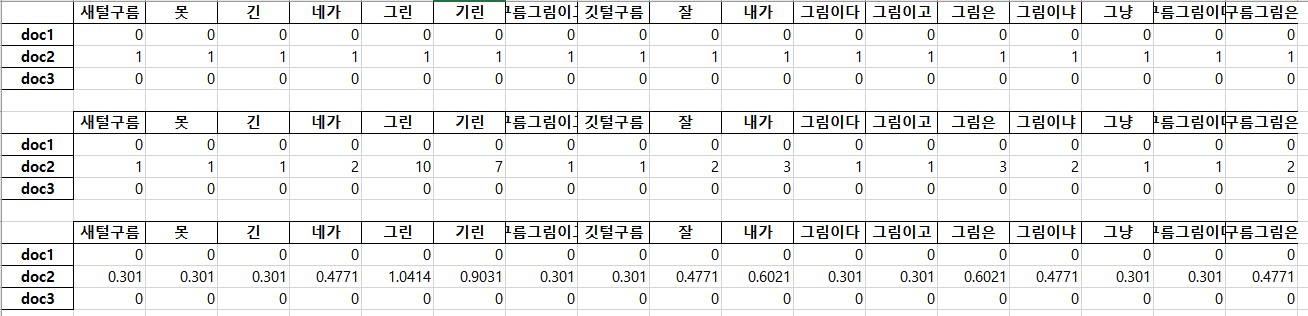

In [24]:
Image("img/document2.jpg")

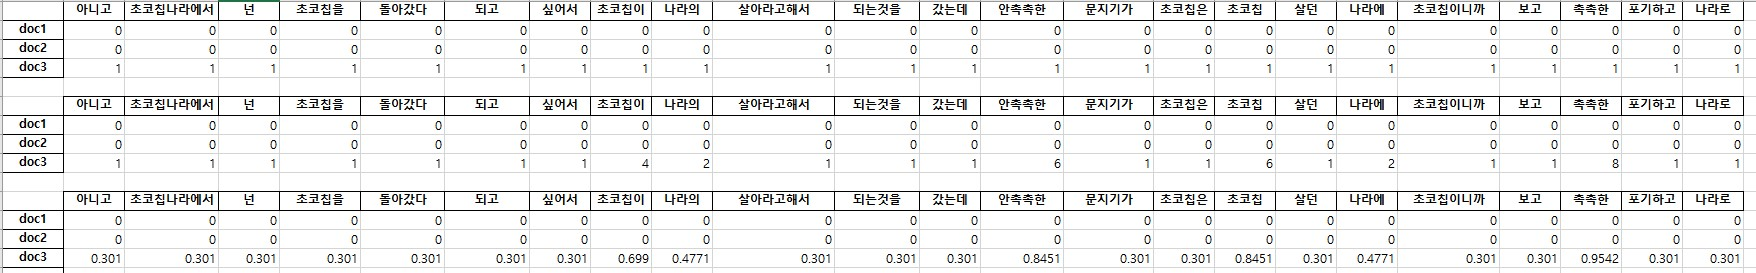

In [25]:
Image("img/document3.jpg")

# 결과 해석
각 document들이 가지고 있는 단어에 대해서 boolean, simple, logarithmatically scaled 3가지 방법으로 표현했습니다.  
이때, 위의 3가지 방법에서 각 doc들의 공통적으로 가지고 있는 단어의 값은 0으로 확인이 되었습니다.  
이는 3개의 document들의 연관성이 없다라고 해석할 수 있습니다.  
  
또한 이 과제에 대해서 띄어쓰기를 기준으로 term을 처리했는데, 명사 위주의 term 구분을 통한 분석을 진행한다면,   
simple와 log방법의 값이 위의 방법보다 더 높게 나올 것으로 판단 됩니다.  
  